

---



---
#**Fronteira Eficiente de Markowitz**



---



---








Sobre mim:
- Autor: Edsson Andonaegui Alonso
- Github: https://github.com/edssonalonso
- linkedin: https://www.linkedin.com/in/edsson-andonaegui/



---



---



#**1. Contextualização**

Uma das técnicas mais utilizadas quando se pensa na integração entre o mercado financeiro e o poder computacional é plotar a chamada “Fronteira Eficiente de Markowitz” que foi desenvolvida na década de 50 pelo próprio, mas na época não chegou a ser testada por conta das limitações computacionais da época. Nos anos 90 Markowitz veio a receber o prémio Nobel de Economia por este mesmo modelo que mostra a fronteira eficiente.

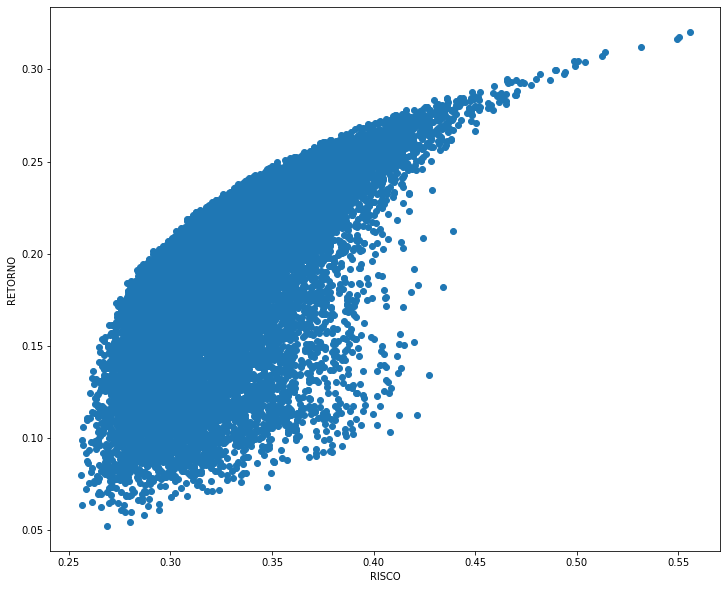

A ideia da fronteira eficiente de Markowitz é simples, essa fronteira eficiente vem de um gráfico (que é o gráfico acima) que faz a comparação entre o risco e o retorno esperado de um portfólio de ações. Para entendermos a ideia geral do modelo vamos utilizar um exemplo: digamos que exista uma carteira de ações composta por 5 ativos:

- Petrobrás;
- Magalu;
- TOTVS;
- Banco do Brasil;
- Vivo (Telefónica Brasil).

A primeira pergunta que todos se fariam é a seguinte: “Quanto dinheiro coloco nas ações da Petrobras, Magalu, TOTVS, BB e na VIVO?”.

 Poderíamos investir igualmente em cada ativo, ou seja, colocaremos 20% do nosso dinheiro em cada ação, ou poderíamos colocar 60% na Magalu e 10% nas demais… Veja que as possibilidades de distribuição de dinheiro (distribuição de pesos) são infinitas! E para cada uma dessas distribuições de pesos existe um retorno e um risco associado… É aqui que entra a Fronteira eficiente de Markowitz, pois ela vai mostrar para a gente as melhores carteiras (melhores distribuições de pesos) para cada tipo risco que o investidor esta disposto a assumir.


Antes de entrarmos nos detalhes de como podemos encontrar essa fronteira eficiente devemos entender esses dois conceitos (risco e retorno esperado). Vamos fazer o cálculo do retorno e do risco de 2 carteiras de ações, onde o única diferença entre as duas será justamente os pesos que cada ativo tem dentro da carteira.



---



---



---



#2. Impostanto Base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Vamos trabalhar com carteiras compostas pelos mesmo ativos do exemplo anterior:

- Petrobrás;
- Magalu;
- TOTVS;
- Banco do Brasil;
- Vivo (Telefónica Brasil).

Vamos importar os histórico de preço diários das ações utilizando a API do Yahoo Finanças (YFINANCE):

In [ ]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.8 MB/s eta 0:00:00


In [ ]:
import yfinance as yf

acoes_nomes = ["MGLU3.SA", "VIVT3.SA", "TOTS3.SA", "PETR4.SA", "BBAS3.SA"]
acoes_df = pd.DataFrame()
for i in acoes_nomes:
  acoes_df[i] = yf.download(i, start='2015-01-01')['Close']#Preco de fechamento da acao
acoes_df


acoes_df.rename(columns = {"MGLU3.SA":"MAGALU", "VIVT3.SA":"VIVO", "TOTS3.SA":"TOTVS", 
                           "PETR4.SA":"Petrobras", "BBAS3.SA":"Banco do Brasil"}, inplace = True)
acoes_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil
Date,,,,,
2015-01-02 00:00:00-02:00,0.232812,37.820000,11.910702,9.360000,22.650000
2015-01-05 00:00:00-02:00,0.237187,37.070000,11.544731,8.560000,22.180000
2015-01-06 00:00:00-02:00,0.234062,36.150002,10.822770,8.280000,22.490000
2015-01-07 00:00:00-02:00,0.241875,37.389999,10.746248,8.670000,23.480000
2015-01-08 00:00:00-02:00,0.240000,38.910000,10.995774,9.230000,23.559999
...,...,...,...,...,...
2023-01-16 00:00:00-03:00,3.850000,38.160000,27.639999,24.040001,35.610001
2023-01-17 00:00:00-03:00,3.790000,39.040001,29.260000,25.520000,37.700001
2023-01-18 00:00:00-03:00,3.560000,40.000000,29.770000,25.070000,38.240002


Aqui eu gostaria ressaltar alguns pontos:

Estamos puxando o preço diário das ações no fechamento do pregão.
Puxamos todo histórico de preços diários começando de 01/01/2015.
Para conseguirmos puxar o histórico das ações precisamos utilizando a API do Yahoo, precisamos passar um lista de nomes (essa lista no código é a lista “acoes_nomes”) com o nomes das ações do jeito em que elas estão na bolsa de valores. Por exemplo, se eu quero as ações da Petrobras eu passo o nome “PETR4.SA”.



---



---



---



#3. Tratamento da Base de Dados

Como o título do tópico já sugere, nesta etapa vamos fazer um tratamento dos dados que acabamos de receber da API do Yahoo, para que possamos calcular o retorno esperado e o risco das carteiras que vamos criar nos passos posteriores.





---



---



##3.1 Normalizando os Dados

O primeiro tratamento que devemos fazer nesses dados é a normalização dos valores dos preços diários das ações em relação ao valor incial de compra. 

Em outras palavras, vamos fazer uma transformação nesse data frame para que consigamos ver o rendimento diário das ações em relação ao preço de compra. Para isso vamos dividir os preços diários de cada ação pelo preço de compra, que é o preço do dia 02/01/2015 (primeiro dia útil de 2015):

In [ ]:
for i in acoes_df.columns:
    acoes_df[i] = acoes_df[i]/acoes_df[i][0]
acoes_df

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil
Date,,,,,
2015-01-02 00:00:00-02:00,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05 00:00:00-02:00,1.018792,0.980169,0.969274,0.914530,0.979249
2015-01-06 00:00:00-02:00,1.005369,0.955844,0.908659,0.884615,0.992936
2015-01-07 00:00:00-02:00,1.038928,0.988630,0.902235,0.926282,1.036645
2015-01-08 00:00:00-02:00,1.030875,1.028821,0.923184,0.986111,1.040177
...,...,...,...,...,...
2023-01-16 00:00:00-03:00,16.536948,1.008990,2.320602,2.568376,1.572185
2023-01-17 00:00:00-03:00,16.279229,1.032258,2.456614,2.726496,1.664459
2023-01-18 00:00:00-03:00,15.291308,1.057641,2.499433,2.678419,1.688300


Ou seja, daqui podemos ver que hoje (18/01/2023) as ações da MAGALU estão valendo 15,5 vezes mais que o preço de compra.



---



---



---



##3.2 Criação Das Carteiras

Com os dados normalizados, podemos comerçar a criar as nossas 2 carteiras, ou seja, podemos atribuir os pesos dos ativos em cada carteira:

**Carteira I**

- 20% na MAGALU.
- 20% na VIVO.
- 10% na TOTVS
- 30% na Petrobras
- 20% no Banco do brasil


**Carteira II**

- 35% na MAGALU.
- 10% na VIVO.
- 15% na TOTVS
- 15% na Petrobras
- 25% no Banco do brasil


Para cada uma dessas carteiras vamos aplicar a mesma quantidade de dinheiro, que neste exemplo será de R$5.000,00:

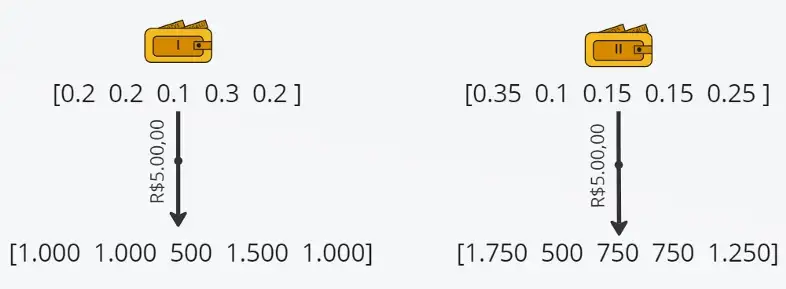

Aplicando essa distribuição de pesos em cada uma das carteiras:

**Carteira I**



In [ ]:
pesos = [0.2, 0.2, 0.1, 0.3, 0.2]
dinheiro = 5000
carteira01 = acoes_df.copy()
for i, ativo in enumerate(acoes_df.columns):
  carteira01[ativo] = acoes_df[ativo]*pesos[i]*5
carteira01

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil
Date,,,,,
2015-01-02 00:00:00-02:00,1.000000,1.000000,0.500000,1.500000,1.000000
2015-01-05 00:00:00-02:00,1.018792,0.980169,0.484637,1.371795,0.979249
2015-01-06 00:00:00-02:00,1.005369,0.955844,0.454330,1.326923,0.992936
2015-01-07 00:00:00-02:00,1.038928,0.988630,0.451117,1.389423,1.036645
2015-01-08 00:00:00-02:00,1.030875,1.028821,0.461592,1.479167,1.040177
...,...,...,...,...,...
2023-01-16 00:00:00-03:00,16.536948,1.008990,1.160301,3.852564,1.572185
2023-01-17 00:00:00-03:00,16.279229,1.032258,1.228307,4.089744,1.664459
2023-01-18 00:00:00-03:00,15.291308,1.057641,1.249716,4.017628,1.688300


**Carteira II**

In [ ]:
pesos = [0.35, 0.1, 0.15, 0.15, 0.25]
dinheiro = 5000
carteira02 = acoes_df.copy()
for i, ativo in enumerate(acoes_df.columns):
  carteira02[ativo] = acoes_df[ativo]*pesos[i]*5
carteira02

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil
Date,,,,,
2015-01-02 00:00:00-02:00,1.750000,0.500000,0.750000,0.750000,1.250000
2015-01-05 00:00:00-02:00,1.782886,0.490085,0.726955,0.685897,1.224062
2015-01-06 00:00:00-02:00,1.759396,0.477922,0.681494,0.663462,1.241170
2015-01-07 00:00:00-02:00,1.818125,0.494315,0.676676,0.694712,1.295806
2015-01-08 00:00:00-02:00,1.804031,0.514410,0.692388,0.739583,1.300221
...,...,...,...,...,...
2023-01-16 00:00:00-03:00,28.939658,0.504495,1.740452,1.926282,1.965232
2023-01-17 00:00:00-03:00,28.488651,0.516129,1.842461,2.044872,2.080574
2023-01-18 00:00:00-03:00,26.759788,0.528821,1.874575,2.008814,2.110375


Vamos adicionar um coluna “Montante” que vai fazer o somatório diário dos investimentos em cada ativo:

**Carteira II**

In [ ]:
carteira02["Montante"] = carteira02.sum(axis = 1)
carteira02

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil,Montante
Date,,,,,,
2015-01-02 00:00:00-02:00,1.750000,0.500000,0.750000,0.750000,1.250000,5.000000
2015-01-05 00:00:00-02:00,1.782886,0.490085,0.726955,0.685897,1.224062,4.909885
2015-01-06 00:00:00-02:00,1.759396,0.477922,0.681494,0.663462,1.241170,4.823444
2015-01-07 00:00:00-02:00,1.818125,0.494315,0.676676,0.694712,1.295806,4.979633
2015-01-08 00:00:00-02:00,1.804031,0.514410,0.692388,0.739583,1.300221,5.050633
...,...,...,...,...,...,...
2023-01-16 00:00:00-03:00,28.939658,0.504495,1.740452,1.926282,1.965232,35.076119
2023-01-17 00:00:00-03:00,28.488651,0.516129,1.842461,2.044872,2.080574,34.972687
2023-01-18 00:00:00-03:00,26.759788,0.528821,1.874575,2.008814,2.110375,33.282373


**Carteira I**

In [ ]:
carteira01["Montante"] = carteira01.sum(axis = 1)
carteira01

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil,Montante
Date,,,,,,
2015-01-02 00:00:00-02:00,1.000000,1.000000,0.500000,1.500000,1.000000,5.000000
2015-01-05 00:00:00-02:00,1.018792,0.980169,0.484637,1.371795,0.979249,4.834643
2015-01-06 00:00:00-02:00,1.005369,0.955844,0.454330,1.326923,0.992936,4.735401
2015-01-07 00:00:00-02:00,1.038928,0.988630,0.451117,1.389423,1.036645,4.904744
2015-01-08 00:00:00-02:00,1.030875,1.028821,0.461592,1.479167,1.040177,5.040631
...,...,...,...,...,...,...
2023-01-16 00:00:00-03:00,16.536948,1.008990,1.160301,3.852564,1.572185,24.130989
2023-01-17 00:00:00-03:00,16.279229,1.032258,1.228307,4.089744,1.664459,24.293998
2023-01-18 00:00:00-03:00,15.291308,1.057641,1.249716,4.017628,1.688300,23.304594




---



---



---



##3.3 Retorno Diário Logarítmico

O próximo passo é transformar esse data frame em que temos os preços diários em um data frame em que podemos ver o rendimento logarítmico diário de cada ação. O nome complicado desse tipo de rendimento diário pode intimidar um pouco, mas o seu calculo é bem simples:

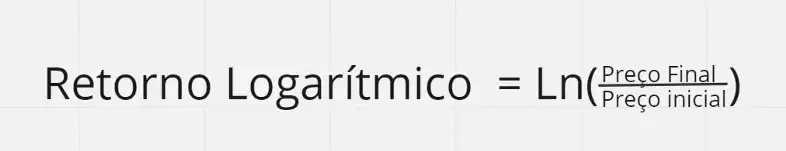

Se estamos interessados em calcular o retorno logarítmico diário, o preço inicial é o preço da ação na abertura do pregão e o preço final é o preço da ação no fechamento do pregão do mesmo dia. Bom… Você poderia pensar que temos um problema, pois nosso conjunto de dados apenas trabalha com o preço no fechamento da bolsa. A solução para esse problema é extremamente simples, devemos lembrar que o preço de fechamento será o preço de abertura do dia seguinte! Fazendo o cálculo do retorno log diário:

**Carteira I**

In [ ]:
retorno_carteira01_log = np.log(carteira01/carteira01.shift(1))
retorno_carteira01_log

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil,Montante
Date,,,,,,
2015-01-02 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00-02:00,0.018618,-0.020030,-0.031208,-0.089345,-0.020969,-0.033631
2015-01-06 00:00:00-02:00,-0.013263,-0.025131,-0.064577,-0.033257,0.013880,-0.020741
2015-01-07 00:00:00-02:00,0.032835,0.033726,-0.007096,0.046026,0.043078,0.035136
2015-01-08 00:00:00-02:00,-0.007782,0.039848,0.022954,0.062590,0.003401,0.027328
...,...,...,...,...,...,...
2023-01-16 00:00:00-03:00,0.115513,0.000786,-0.018639,-0.021807,-0.001123,0.072888
2023-01-17 00:00:00-03:00,-0.015707,0.022799,0.056957,0.059743,0.057034,0.006732
2023-01-18 00:00:00-03:00,-0.062605,0.024293,0.017280,-0.017791,0.014222,-0.041579


**Carteira II**

In [ ]:
retorno_carteira02_log = np.log(carteira02/carteira02.shift(1))
retorno_carteira02_log

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil,Montante
Date,,,,,,
2015-01-02 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00-02:00,0.018618,-0.020030,-0.031208,-0.089345,-0.020969,-0.018187
2015-01-06 00:00:00-02:00,-0.013263,-0.025131,-0.064577,-0.033257,0.013880,-0.017762
2015-01-07 00:00:00-02:00,0.032835,0.033726,-0.007096,0.046026,0.043078,0.031868
2015-01-08 00:00:00-02:00,-0.007782,0.039848,0.022954,0.062590,0.003401,0.014157
...,...,...,...,...,...,...
2023-01-16 00:00:00-03:00,0.115513,0.000786,-0.018639,-0.021807,-0.001123,0.091907
2023-01-17 00:00:00-03:00,-0.015707,0.022799,0.056957,0.059743,0.057034,-0.002953
2023-01-18 00:00:00-03:00,-0.062605,0.024293,0.017280,-0.017791,0.014222,-0.049539




---



---



---



#4. Cálculo Retorno Esperado do Portfólio

Com o retorno logarítmico da nossa carteira podemos finalmente fazer o calculo do retorno esperado da carteira como um todo. O cálculo do retorno esperado da carteira pode ser feita com a seguinte código:

**Carteira II**

In [ ]:
pesos_careteira02 = np.array([0.35, 0.1, 0.15, 0.15, 0.25])
retorno_esperado_carteira02 = np.sum(retorno_carteira02_log["Montante"].mean()*pesos_careteira02)*246
retorno_esperado_carteira02

0.23996775186887961

**Carteira I** 

In [ ]:
pesos_careteira01 = np.array([0.2, 0.2, 0.1, 0.3, 0.2])
retorno_esperado_carteira01 = np.sum(retorno_carteira01_log["Montante"].mean()*pesos_careteira01)*246
retorno_esperado_carteira01

0.1955306403442982

Como podemos ver nos códigos estamos multiplicando o somatório do produto entre a média dos retornos logarítmicos diários e os pesos dos ativos com o número 246. Essa é a quantidade de dias úteis que existem no ano, ou seja, são os dias em que a bolsa de valores opera, quando multiplicamos por 246 estamos fazendo o que os economistas chamam de anualizar a taxa, isto é, se não multiplicássemos por 246 o que estaríamos calculando seria o retorno esperado diário da carteira, isto é de novo, quando multiplicamos por 246 estamos calculando o retorno esperado anual.

Logo temos os seguintes valores para o retorno esperado das duas carteiras:


- Retorno Esperado Carteira I → Retorno de 19% anual.
- Retorno Esperado Carteira II → Retorno de 24% anual.


Se tivéssemos somente com essa informação para fazer a escolha de qual carteira investir, escolheríamos a carteira II… Mas ainda existe um perigo, isto é, não sabemos se a carteira II é mais ou menor ariscada que a carteira I (quando digo risco, estou falando da probabilidade de termos prejuízos). Por esse motivo sempre comparamos o risco de uma carteira com o seu retorno esperado para ver se vale a pena ou não investir nela.



---



---



---



#5. Cálculo Volatilidade/Risco do Portfólio

O risco de uma carteira está intimamente relacionado com a sua variação, ou seja, se um portfólio tem uma variação de preço muito grande ele é considerado um portfólio ariscado. Sendo mais preciso, o risco de uma carteira de ações nada mais que que seu desvio padrão (literalmente).

Se fossemos calcular o risco padrão/desvio padrão de uma ação, poderíamos fazer isso de forma simples e intuitiva, apenas utilizando a formula do desvio padrão que aprendemos na escola. O cálculo do desvio padrão de um portfólio de ações é um pouco mais complicado, pois estamos queremos fazer o cálculo de desvio padrão de algo que é composto de vários ativos. Sendo direto, o desvio padrão/risco de um portfólio poder ser calculado pela seguinte formula:

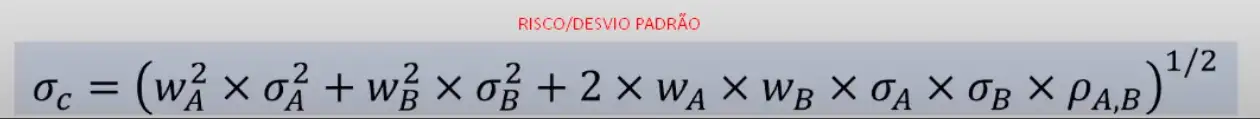

onde:

- “Wa” é o peso do ativo “a”, no nosso exemplo pode ser o peso de TOTVS ou da Petrobras.
- “σa” é o desvio padrão individual do ativo “a”.
- ρa,b é a correlação de Person entre os ativos “a” e “b”.

A formula acima é para o caso onde o portfólio é composto por 2 ativos, mas a lógica para um portfólio com mais de 2 ativos (que é nosso caso) segue o mesmo.

Para nossa sorte, podemos fazer esse cálculo presente da formula através de operações matriciais. O primeiro passo é fazer a matriz da covariância entre os ativos que compõe o portfólio, mas atenção pois essa matriz de covariância deve ser feita sobre o data frame de retornos log diários:

**Carteira II**

In [ ]:
matriz_covarianca02 = retorno_carteira02_log.iloc[:,:5].cov()
matriz_covarianca02

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil
MAGALU,0.001767,0.000159,0.000361,0.000382,0.000423
VIVO,0.000159,0.000352,0.000110,0.000190,0.000184
TOTVS,0.000361,0.000110,0.000620,0.000251,0.000239
Petrobras,0.000382,0.000190,0.000251,0.001079,0.000583
Banco do Brasil,0.000423,0.000184,0.000239,0.000583,0.000775


**Carteira I**

In [ ]:
matriz_covarianca01 = retorno_carteira01_log.iloc[:,:5].cov()
matriz_covarianca01

,MAGALU,VIVO,TOTVS,Petrobras,Banco do Brasil
MAGALU,0.001767,0.000159,0.000361,0.000382,0.000423
VIVO,0.000159,0.000352,0.000110,0.000190,0.000184
TOTVS,0.000361,0.000110,0.000620,0.000251,0.000239
Petrobras,0.000382,0.000190,0.000251,0.001079,0.000583
Banco do Brasil,0.000423,0.000184,0.000239,0.000583,0.000775


Sobre a matriz de covariância vamos fazer as seguintes operações:

- **Risco/Desvio Padrão = raiz(pesos*(Matriz_cov *246* pesos))**

Como estamos falando de multiplicação entre matrizes a ordem importa, logo o cálculo deve ser feito seguindo a ordem de prioridade que consta na formula.

**Carteira I**

In [ ]:
pesos_careteira01 = np.array([0.2, 0.2, 0.1, 0.3, 0.2])
risco_carteira01 = np.sqrt( np.dot( pesos_careteira01, np.dot( matriz_covarianca01*246, pesos_careteira01 ) )) 
risco_carteira01

0.337269844943087

- **Risco Carteira I : 33,7%**

**Carteira II** 

In [ ]:
pesos_careteira02 = np.array([0.35, 0.1, 0.15, 0.15, 0.25])
risco_carteira02 = np.sqrt(np.dot(pesos_careteira02, np.dot(matriz_covarianca02*246, pesos_careteira02)))
risco_carteira02

0.37143866085813326

- **Risco Carteira II : 37,7%**



---



---



##5.1 Comparando Risco com Retorno Esperado 

Veja que temos retornos e riscos diferentes para duas carteiras que contém o mesmo ativos/ações mas com pesos diferentes:

- Carteira I → Risco 33,7% e Retorno Esperado de 19%.

- Carteira II → Risco 37,7 e Retorno Esperado de 24%.

Se fizermos um gráfico onde o eixo X é o risco e o Y é o retorno esperado contendo somente essas duas carteiras ela ficaria da seguinte forma:

Text(0, 0.5, 'RETORNO')

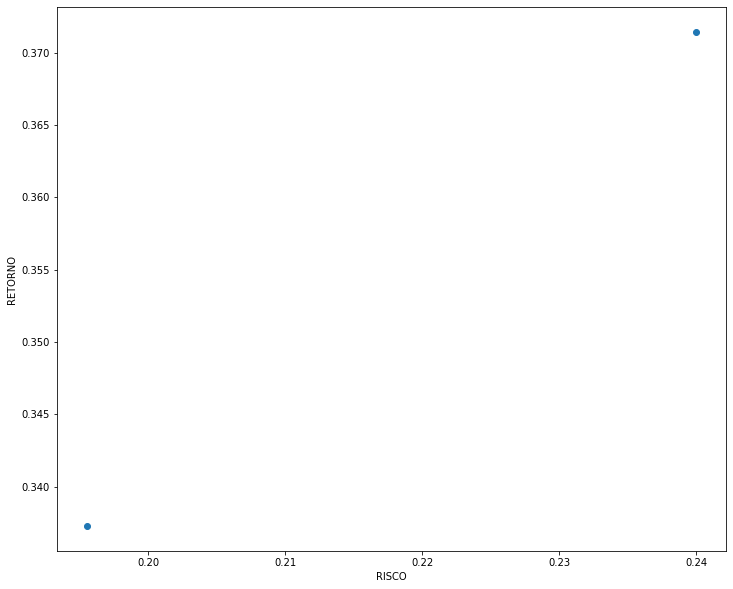

In [ ]:
riscos = [risco_carteira01, risco_carteira02]
retornos = [retorno_esperado_carteira01, retorno_esperado_carteira02]
plt.figure(figsize=(12,10))
plt.scatter(retornos, riscos)
plt.xlabel("RISCO")
plt.ylabel("RETORNO")



---



---



---



#6. Plotando Fronteira Eficiente de Markowitz

Para plotarmos o gráfico onde poderemos visualizar a Fronteira Eficiente de Markowitz o que precisamos fazer é calcular de risco e retorno esperado para várias configurações de pesos diferentes, ou seja, para várias carteiras diferentes, no nosso exemplo calculamos o risco e o retorno esperado para apenas 2 carteiras.

Para não perdermos tempo fazendo todos aqueles passos que fizemos um a um de cada vez, podemos colocar todos eles em uma função única, ou seja, nossa função recebe como parâmetro:

- Dataframe com histórico dos preços das ações.
- Valor inicial de investimento em reais.
- O número de carteiras diferentes que queremos calcular o risco e retorno esperado.


A primeira coisa que a função vai fazer é gerar pesos randomicos para cada um dos ativos que compõe o portfólio, ou seja, a primeira coisa que ele fazer é criar uma carteira e logo depois vai ser calculado o risco e o retorno esperado dela. Colocamos isso em um loop onde em cada loop geramos uma carteira nova randomicamente e repetimos os calculos de risco e retorno esperado.

Vamos guardando os risco e retornos de cada carteira criada em listas e vamos usar essas listas para plotarmos o gráfico onde estará a Fronteira Eficiente de Markowitz.

In [ ]:
#Repeticoes é o numero de vezes que vamos rodar o laco for que esta no algoritimo
#Em cada iteração do laco criaremos uma carteira randomica
def alocacao_portifolio(dataset, dinheiro_total,repeticoes):
  dataset = dataset.copy()
  dataset_virgem = dataset.copy()

  lista_retorno_esperado = []
  lista_volatividade_esperada = []
  lista_sharpe_ratio = []

  for rep in range(repeticoes):
    # Estamos fazendo com que o laco for faca "repeticoes"
    #Gerando pessos aleatorios  
    pesos = np.random.random(len(dataset.columns))
    pesos = pesos/pesos.sum()#"Normalizando" os dados

    #transformacao do dataframe para um que tenha o 
    #rendimento diario em relacao ao preco inicial
    for i in dataset.columns:
      dataset[i] = dataset[i]/dataset[i][0]

    #transformando o rendimento diário em Dinheiro com os pesos
    for i, empresa in enumerate(dataset.columns):
      dataset[empresa] = dataset[empresa]*pesos[i]*dinheiro_total

    retorno_carteira_log = np.log(dataset/dataset.shift(1))
    #vamos deixar guardado nesta variavel o datatset mas com os retornos logaritmicos
    matriz_covarianca = retorno_carteira_log .cov()
    #Matriz de covcariancia calculado sobre o dataframe de retorno log

    dataset["Montante"] = dataset.sum(axis=1)
    dataset["Taxa Retorno Log"] = 0.0

    for i in range(1, len(dataset)):
      dataset["Taxa Retorno Log"][i] = np.log(dataset["Montante"][i]/dataset["Montante"][i-1])

    retorno_esperado = np.sum(dataset["Taxa Retorno Log"].mean()*pesos)*246 
    #calculo do retorno esperado da carteira
    volatividade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covarianca*246, pesos)))
    #calculo do risco/desvio padrao da carteira

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatividade_esperada.append(volatividade_esperada)

    dataset = dataset_virgem.copy()
    #Aqui retornamos para o dataset original/virgem, pois vamos rodar de novo o laco

  return  lista_volatividade_esperada, lista_retorno_esperado  

Plotando o gráfico com as listas de retorno e risco:

Text(0, 0.5, 'RETORNO')

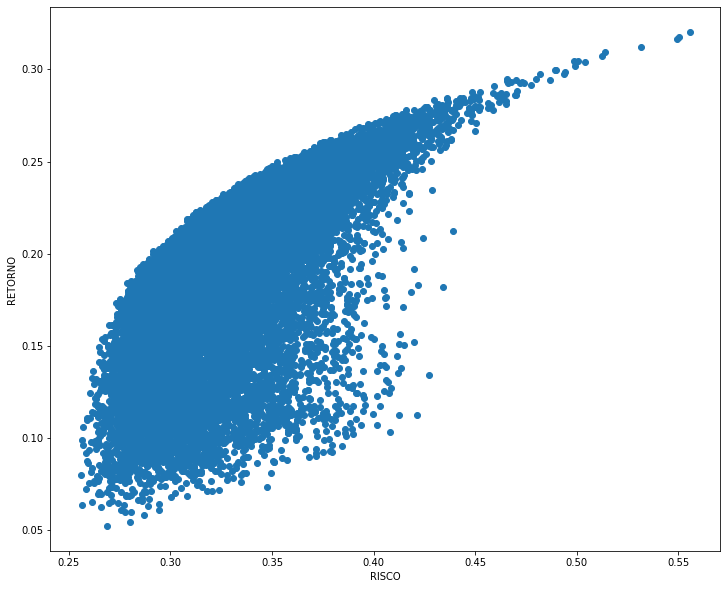

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(volatividade_lista, retorno_lista, c= sharpe_lista)
plt.colorbar(label= "Sharpe Ratio")
plt.xlabel("RISCO")
plt.ylabel("RETORNO")


Interpretando o gráfico podemos ver a seguinte situação:

Para cada valor de Risco existem configurações de carteiras com mais ou menos Retorno. Por exemplo:

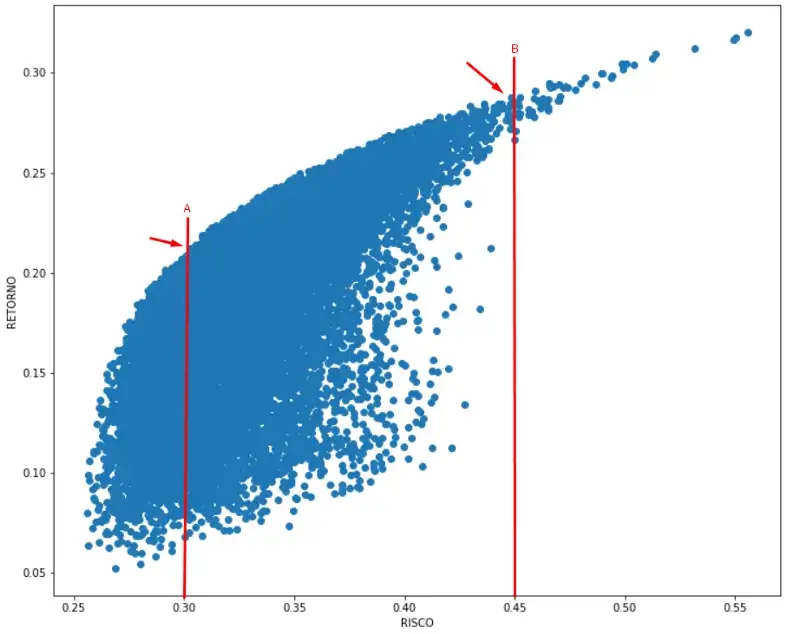

Podemos ver que, se uma pessoa aceita correr um risco de 30%, existem existem várias carteiras que tem esse risco (ponto sobre a reta A), mas existem uma que tem o maior retorno esperado com o mesmo risco de 30% (que é o ponto marcado pelo seta). Nesse sentido escolher outra carteira (outro ponto da reta A) que não seja esse é burrice, pois estaríamos correndo o mesmo risco para ter um retorno menor.

Outro exemplo, digamos que agora estamos lidando com um investidor menor conservador que aceite correr um risco de 45%. Olhando o gráfico podemos ver que a melhor escolha é a carteira apontada pela seta, pois tem o maior retorno pelo mesmo risco de 45%.

A Fronteira Eficiente de Markowitz segue exatamente essa lógica, pois a Fronteira Eficiente nos mostra as carteiras que tem maior retorno para cada risco que assumimos. Selecionando no gráfico todas as configurações de carteiras que se encontram na fronteira teremos o seguinte desenho:

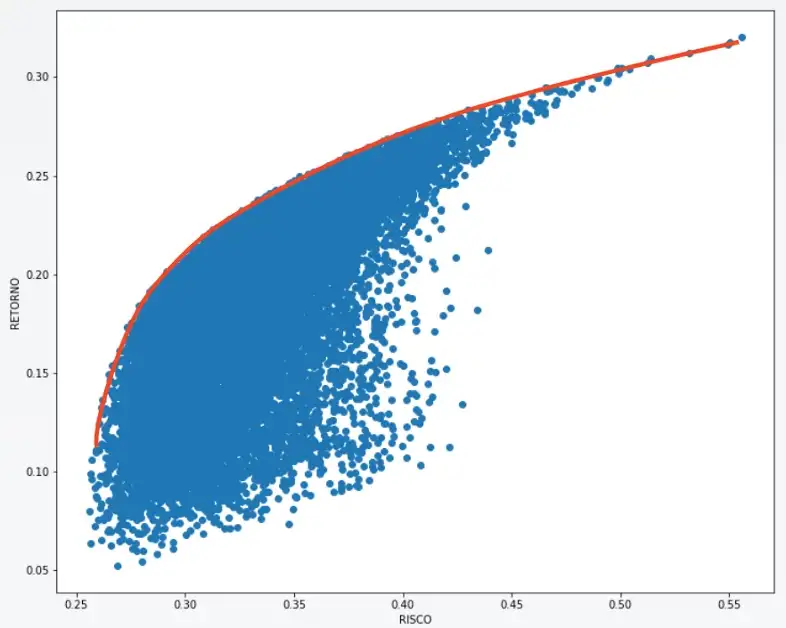

Esse linha é o que Markowitz chamou de Fronteira Eficiente, pois toda carteira dentro dessa linha representa a melhor optimização possível para aquele risco assumido.

Devemos salientar que este tipo de optimização tem alguns contras:

- Demora muito para ser processado. Por exemplo, o gráfico que você tem 20.000 pontos, ou seja, tem 20.000 configurações de carteiras diferentes e ele demorou 3h para rodar! Por esse motivo é muito comum que se aplique algoritmos de otimização sobre essa função que calcula esses 20.000 ou mais pontos… Veremos isso em outro artigo do Medium que estou escrevendo.
- A otimização de portfólios pela fronteira eficiente de Markowitz não é uma garantia que aquele melhor portfólio da carteira sobre a fronteira eficiente vai realmente ter aquele rendimento, pois ainda existe o que chamamos de Risco Sistêmico, que é a mudança no preço das ações causada por fatores externos maiores (externos à administração interna da empresas), como por exemplo, uma pandemia, recessão da economia, instabilidade politica, guerras na Europa…